# Sleep EEG spindles detection

## Intoductory notes:
This notebook presents spindles detection functionality.

Recommended readings:
1. [YASA: FAQ](https://raphaelvallat.com/yasa/build/html/faq.html#event-detection)
2. [YASA: Spindles detection on specific sleep stages](https://github.com/raphaelvallat/yasa/blob/master/notebooks/03_spindles_detection_NREM_only.ipynb)
3. [YASA: SpindlesResults class](http://raphaelvallat.com/yasa/build/html/generated/yasa.SpindlesResults.html#yasa.SpindlesResults)
4. [MNE: Time-frequency analysis: power and inter-trial coherence](https://mne.tools/stable/auto_tutorials/time-freq/20_sensors_time_frequency.html#time-frequency-analysis-power-and-inter-trial-coherence)
5. [MNE: AverageTFR class](https://mne.tools/stable/generated/mne.time_frequency.AverageTFR.html#mne-time-frequency-averagetfr)

## Import module
Add pipeline module to path and import its elements (just run this cell).

In [1]:
%matplotlib widget
from sleepeeg.pipeline import SpindlesPipe

## Spindles detection

In [2]:
spindles_pipe = SpindlesPipe(
    path_to_eeg=r"C:\Users\Gennadiy\Documents\data\HZ4\processing\ICAPipe\after_ica_raw.fif",
    output_dir=r"C:\Users\Gennadiy\Documents\data\HZ4\processing",
    path_to_hypno=r"C:\Users\Gennadiy\Documents\data\HZ4\staging.txt",
    hypno_freq=1
    )

Opening raw data file C:\Users\Gennadiy\Documents\data\HZ4\processing\ICAPipe\after_ica_raw.fif...
    Reading extended channel information
    Read a total of 1 projection items:
        Average EEG reference (1 x 257)  idle
    Range : 0 ... 2032249 =      0.000 ...  8128.996 secs
Ready.
Opening raw data file C:\Users\Gennadiy\Documents\data\HZ4\processing\ICAPipe\after_ica_raw-1.fif...
    Reading extended channel information
    Read a total of 1 projection items:
        Average EEG reference (1 x 257)  idle
    Range : 2032250 ... 2229772 =   8129.000 ...  8919.088 secs
Ready.


c:\Users\Gennadiy\Documents\eeg-processing-pipeline\.venv\Lib\site-packages\antropy\fractal.py:197: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit((types.Array(types.float64, 1, "C", readonly=True), types.int32))
05-Jun-23 13:46:25 | WARNING | Hypnogram is LONGER than data by 0.91 seconds. Cropping hypnogram to match data.size.


Please refer to the YASA's [documentation](https://raphaelvallat.com/yasa/build/html/generated/yasa.spindles_detect.html) for details about the arguments.

In [3]:
spindles_pipe.detect(
    picks=['eeg'],
    include=(0, 1, 2, 3, 4),
    freq_sp=(12, 15),
    freq_broad=(1, 30),
    duration=(0.5, 2),
    min_distance=500,
    thresh={"corr": 0.65, "rel_pow": 0.2, "rms": 1.5},
    multi_only=False,
    remove_outliers=False,
    save=True
)

Reading 0 ... 2229772  =      0.000 ...  8919.088 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Removing existing average EEG reference projection.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 257 out of 257 | elapsed:    9.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 257 out of 257 | elapsed:   10.9s finished


Please refer to the YASA's [documentation](https://raphaelvallat.com/yasa/build/html/generated/yasa.SpindlesResults.html#yasa.SpindlesResults.summary) for details about the arguments.

In [4]:
spindles_pipe.results.summary(
    grp_chan=False, 
    grp_stage=True, 
    mask=None, 
    aggfunc='mean', 
    sort=True
)

Count     Density  Duration  Amplitude        RMS  AbsPower  RelPower   
Stage                                                                          
0       3576  202.588633  0.913783  51.198008  10.981419  1.945912  0.299497  \
1        117   18.000000  0.762291  44.201503   9.829130  1.989036  0.397107   
2      57660  880.305344  0.949568  51.638215  11.039142  2.005896  0.379532   
3       4035   97.228916  0.792961  57.127448  12.584465  2.131637  0.339456   
4         13    0.742857  0.556923  39.408395   9.360948  1.957157  0.322138   

       Frequency  Oscillations  Symmetry  
Stage                                     
0      12.485377     10.743289  0.489896  
1      13.675354     10.068376  0.475677  
2      13.478268     12.317499  0.504665  
3      13.627088     10.452045  0.504647  
4      12.518032      6.461538  0.647187

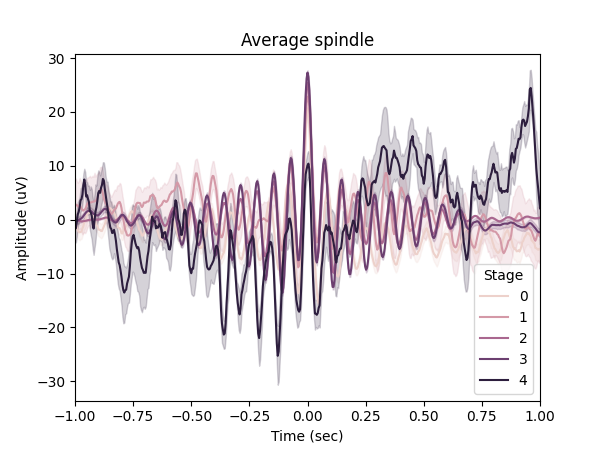

In [5]:
spindles_pipe.plot_average(
    save=True, 
    center="Peak",
    hue="Stage",
    time_before=1,
    time_after=1,
    filt=(None,None),
    mask=None,
)

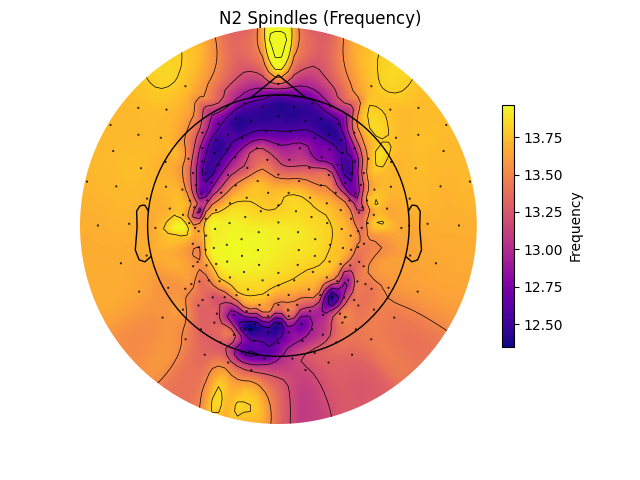

In [6]:
spindles_pipe.plot_topomap(
    prop='Frequency',  #  Any of the event properties returned by pipe.results.summary().
    stage='N2',  # Stage to plot the topomap for.
    aggfunc='mean',  # Aggregation function for channel grouping.
    # Should contain at least index of the provided "stage".
    sleep_stages={"Wake": 0, "N1": 1, "N2": 2, "N3": 3, "REM": 4},  
    axis=None,  # Whether to plot on provided matplotlib axis.
    save=True,  # Whether to save the plot as a file.
    topomap_args=dict(cmap="plasma"),  # Arguments passed to mne.viz.plot_topomap().
    cbar_args=None,  # Arguments passed to plt.colorbar().
    subplots_args=None,  # Arguments passed to the plt.subplots(). Have no effect if axis is provided.
)

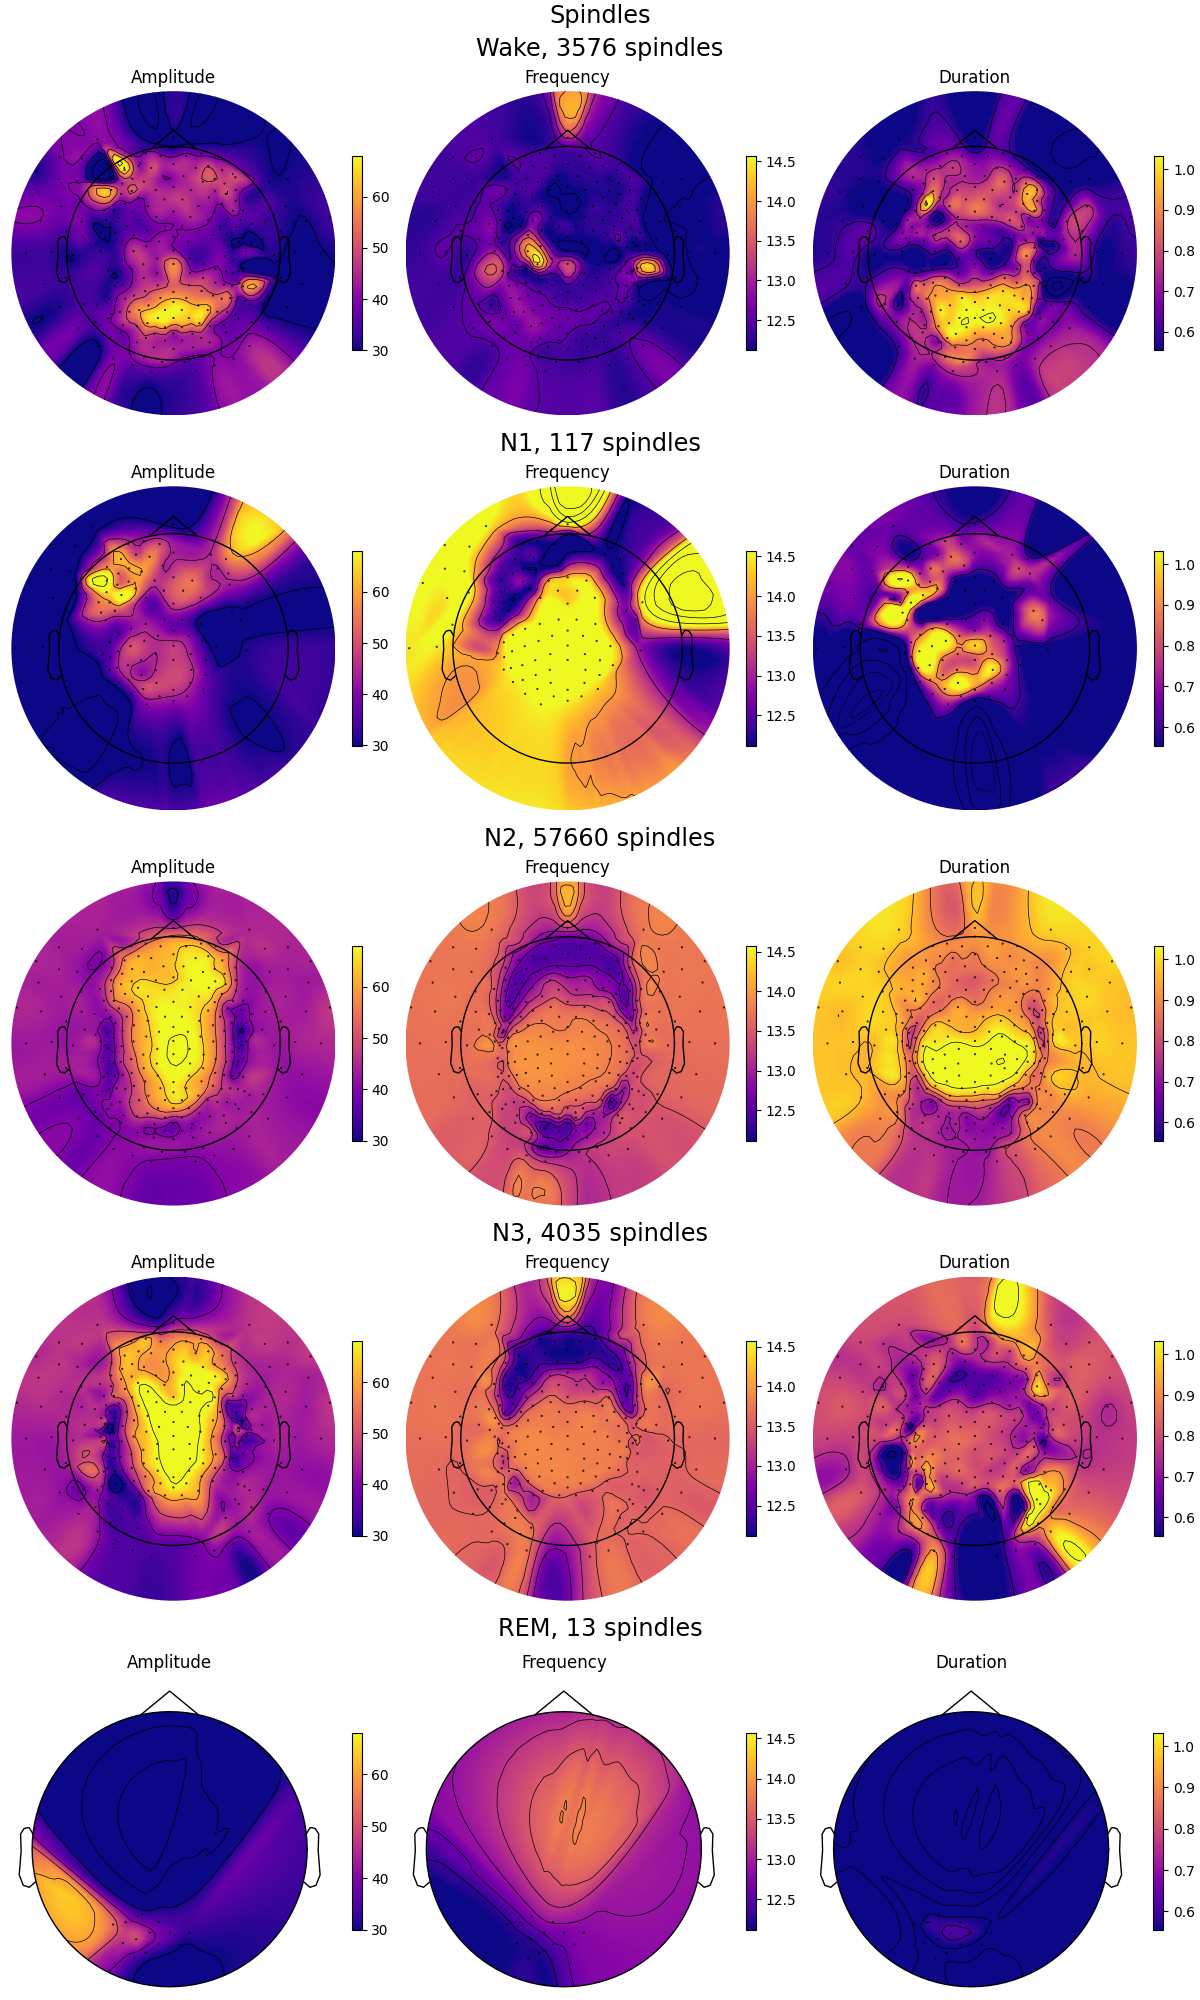

In [7]:
spindles_pipe.plot_topomap_collage(
    # Some of the event properties returned by pipe.results.summary().
    props=['Amplitude', 'Frequency', 'Duration'], 
    aggfunc="mean",  # Aggregation function for channel grouping.
    # Tuple of strs or "all", e.g., ("N1", "REM") or "all" (plots all "sleep_stages").
    stages_to_plot="all",
    # Should contain at least indices of the provided "stages_to_plot".
    sleep_stages={"Wake": 0, "N1": 1, "N2": 2, "N3": 3, "REM": 4},
    low_percentile=5,  # Set min color value by percentile of the property data.
    high_percentile=95,  # Set max color value by percentile of the property data.
    save=True,  # Whether to save the plot as a file.
    topomap_args=dict(cmap="plasma"),  # Arguments passed to mne.viz.plot_topomap().
    cbar_args=None,  # Arguments passed to plt.colorbar().
    figure_args=None,  # Arguments passed to the plt.figure().
)

Constructs MNE [AverageTFR](https://mne.tools/stable/generated/mne.time_frequency.AverageTFR.html) object for every available sleep stage.

In [8]:
spindles_pipe.apply_tfr(
    freqs=(10,20),  # Interval of frequencies of interest.
    n_freqs=100,  # TFR frequency resolution.
    time_before=1,  # Time in sec before the peak to use in TFR computation. Should be positive.
    time_after=1,  # Time in sec after the peak to use in TFR computation.
    method='morlet',  # TFR method: 'morlet' or 'multitaper'.
    save=True  # Whether to save AverageTFR object per sleep stage as hdf5 file.
)

spindles_pipe.tfrs

100%|██████████| 13/13 [00:00<00:00, 86.32it/s]


{'N2': <AverageTFR | time : [-1.000000, 1.000000], freq : [10.000000, 20.000000], nave : 224, channels : 257, ~98.5 MB>,
 'N3': <AverageTFR | time : [-1.000000, 1.000000], freq : [10.000000, 20.000000], nave : 18, channels : 224, ~85.9 MB>,
 'Wake': <AverageTFR | time : [-1.000000, 1.000000], freq : [10.000000, 20.000000], nave : 15, channels : 236, ~90.5 MB>,
 'N1': <AverageTFR | time : [-1.000000, 1.000000], freq : [10.000000, 20.000000], nave : 1, channels : 97, ~37.3 MB>,
 'REM': <AverageTFR | time : [-1.000000, 1.000000], freq : [10.000000, 20.000000], nave : 1, channels : 13, ~5.1 MB>}

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
No baseline correction applied


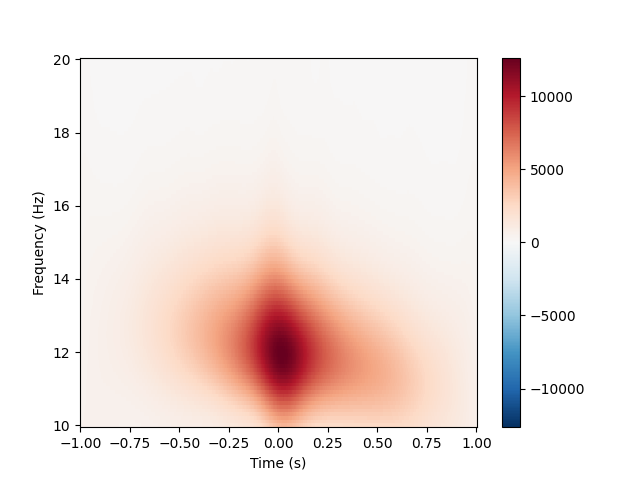

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
No baseline correction applied


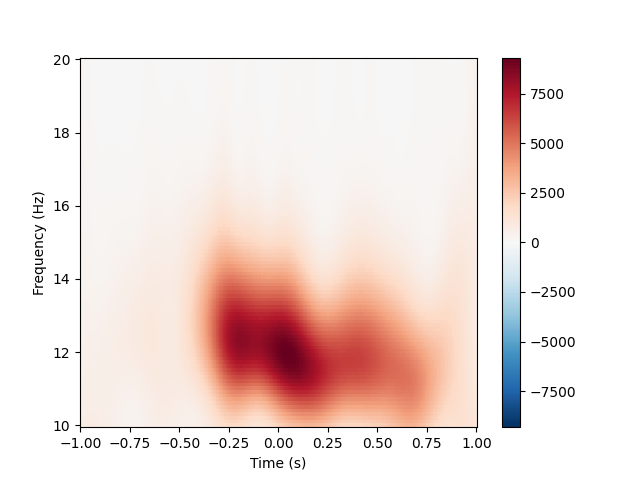

[<Figure size 640x480 with 2 Axes>]

In [9]:
spindles_pipe.tfrs['N2'].plot(['E101']), 
spindles_pipe.tfrs['N3'].plot(['E101'])

If you want to load saved TFR files:

In [10]:
spindles_pipe.read_tfrs(dirpath=None)

Reading C:\Users\Gennadiy\Documents\data\HZ4\processing\SpindlesPipe\spindles_N1-tfr.h5 ...
Reading C:\Users\Gennadiy\Documents\data\HZ4\processing\SpindlesPipe\spindles_N2-tfr.h5 ...
Reading C:\Users\Gennadiy\Documents\data\HZ4\processing\SpindlesPipe\spindles_N3-tfr.h5 ...
Reading C:\Users\Gennadiy\Documents\data\HZ4\processing\SpindlesPipe\spindles_REM-tfr.h5 ...
Reading C:\Users\Gennadiy\Documents\data\HZ4\processing\SpindlesPipe\spindles_Wake-tfr.h5 ...
